In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import ipysheet as ips
import panel as pn
pn.extension('katex', 'mathjax') 

### Tutorial 3 #

+ **solutions for homework problems 1 – 4**

+ **tutorial problems on effective conductivity and flow nets**

+ **homework problems on effective conductivity and flow nets**

````





### Solutions for Homework Problems 1 – 4 ###




### Homework Problem 1 ###

The pressure head in an aquifer extending over 200 km$^2$ is decreased by 1.60 m.
Determine the loss of groundwater in the aquifer for two scenarios:
  The aquifer is unconfined (storage coefficient 0.13).
  The aquifer is confined (storage coefficient 0.0005).

### Tutorial Problem 7 – Solution ###

<img src="images/T03_H1.PNG" alt="Grosser Garten Map"  width="40%" height="100%" >


In [2]:
# Given 
A = 200 # km^2, aquifer area
D_h = 1.6 # m, head decrease
S_u = 0.13 # (-), Storativity unconfined aquifer
S_c = 0.0005 # (-) Storage coefficient, confined aquifer

# Solution
DV_wu = A*S_u*D_h * 10**6 # m^3 change in water volume unconfined aquifer
DV_wc = A*S_c*D_h* 10**6  # m^3 change in water volume unconfined aquifer

# output

print("Change in water volume in unconfined aquifer is: {0:1.1e}".format(DV_wu),"m\u00b3 \n")
print("Change in water volume in confined aquifer is: {0:1.1e}".format(DV_wc),"m\u00b3")

Change in water volume in unconfined aquifer is: 4.2e+07 m³ 

Change in water volume in confined aquifer is: 1.6e+05 m³


## Homework Problem 2

Conduct a sieve analysis for a dried soil sample (see data in the table below)

1. Draw the granulometric curve (cumulative mass distribution) and briefly characterise the sediment with regard to its major constituent(s).
2. What is the coefficient of uniformity? 


In [3]:
#
title = ["mesh   size  [mm] ", "residue in the sieve [g] ", "∑ total", "∑ / ∑total"]
Size = [6.3, 2, 0.63, 0.2, 0.063, "< 0.063 /cup"]
passed = [11, 62, 288, 189, 42, 8]
s2 = ips.sheet(rows=6, columns=4, row_headers=False, column_headers=title)
ips.column(0, Size, row_start=0) 
ips.column(1, passed, row_start=0); s2 

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=5, row_start=0, squeeze_row=False, value=[6.3, 2, 0.63…

In [4]:
# Solution of problem 2

t_sample = np.sum(passed) # g, add the residue column to get total mass
retain_per = passed/t_sample *100 # %, # retain percentage residue/total mass
retain_per_cumsum =np.cumsum(retain_per) # get the cummulative sum of the reatined
passing_per = 100 - retain_per_cumsum # substract 100-cummsum to get passing % - the last column

#Output
s3 = ips.sheet(rows=6, columns=4, row_headers=False, column_headers=title)
ips.column(0, Size, row_start=0) 
ips.column(1, passed, row_start=0); 
ips.column(2, retain_per, row_start=0); 
ips.column(3, passing_per, row_start=0); s3 


Sheet(cells=(Cell(column_end=0, column_start=0, row_end=5, row_start=0, squeeze_row=False, value=[6.3, 2, 0.63…

Text(0.06, 11, 'd10')

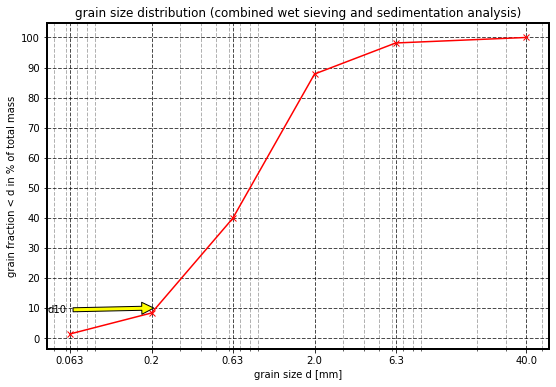

In [5]:
# Plotting granulometric curve

plt.rcParams['axes.linewidth']=2
#plt.rcParams["axes.edgecolor"]='white'
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth']=1
x = np.append([40], Size[:5])
y = np.append([100],passing_per[:5])
fig = plt.figure(figsize=(9,6))
plt.plot(x, y, 'x-', color='red')  
tics=x.tolist()
plt.xscale('log')
plt.grid(which='major', color='k', alpha=0.7) 
plt.grid(which='minor', color='k', alpha=0.3)
plt.xticks(x, tics);  
plt.yticks(np.arange(0,110,10));
plt.title('grain size distribution (combined wet sieving and sedimentation analysis)');
plt.xlabel('grain size d [mm]');
plt.ylabel('grain fraction < d in % of total mass');

#plt.arrow(0,5, 0.2, 5, color='red',shape ='right',  length_includes_head = True)  
#plt.annotate('d10', xy=(0.22, 10), xytext=(0.03, 10),arrowprops=dict(facecolor='red', shrink=0.05), ) 
plt.annotate('d10', xy=(0.22, 10),  xycoords='data', xytext=(0.06, 11), arrowprops=dict(facecolor='yellow', shrink=0.05),horizontalalignment='right', verticalalignment='top',)
 

PNG(str, width=400)
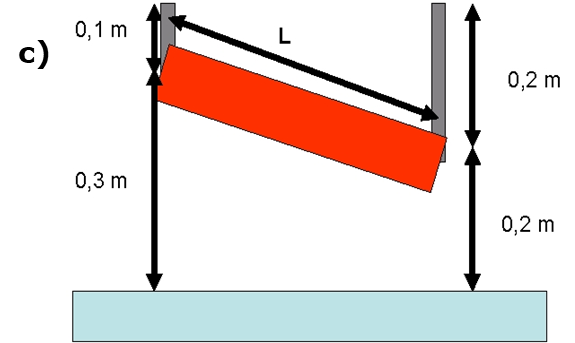

In [6]:
png_pane3 = pn.pane.PNG("images/T02_TP7_c1.png", width=400)
png_pane3 

In [7]:
# Image (c)
L = 0.5 # m, length of the column
Ec_hl = 0.3 #, m, elevation head, left 
Pc_hl = 0.1 #, m  pressure head, left
Ec_hr = 0.2 #, m, elevation head, right
Pc_hr = 0.2 #, m  pressure head, right
Hc_hl = Ec_hl + Pc_hl # m, hydraulic head, left
Hc_hr = Ec_hr + Pc_hr # m, hydraulic head, right
DH_c = Hc_hr - Hc_hl
H_gc = DH_c/L#, no unit, hydraulic gradient 
print("Hydraulic head LEFT: {0:1.1f}".format(Hc_hl),"m");print("Hydraulic head LEFT:: {0:1.1f}".format(Hc_hr),"m") 
print("Hydraulic Head Difference: {0:1.1f}".format(DH_c),"m");print("Hydraulic gradient: {0:1.1f}".format(H_gc)) 
png_pane3.object = "images/T02_TP7_c2.png" 

Hydraulic head LEFT: 0.4 m
Hydraulic head LEFT:: 0.4 m
Hydraulic Head Difference: 0.0 m
Hydraulic gradient: 0.0


### Tutorial Problem 8  ###

The hydraulic conductivity of a fine sand sample was found to be equal to $1.36\times 10^{-5}$ m/s in a Darcy experiment using water at a temperature of $20^\circ$C. What is the intrinsic permeability of this sample? Give results in cm$^2$ and D.
(density of water at $20^\circ$C: 998.2 kg/m$^3$; dynamic viscosity of water at $20^\circ$C: $1.0087 \times 10^{-3}$ Pa$\cdot$s;  1 D = $0.987\times 10^{-12}$ m$^2$) 

### Tutorial Problem 8  - Solution ###

relationship between hydraulic conductivity $K$ and intrinsic permeability $k$ from lecture notes:
$$
K_{water} = k\cdot \frac{\rho_{water}\cdot g}{\eta_{water}}
$$

Solve for , $k$

$$
k = \frac{\eta_{water}\cdot K_{water}}{\rho_{water}\cdot g}{}
$$

In [8]:
#Given
Darcy = 0.987 * 10**-12 # m^2, 1D = 0.987*10^-12 m^2 
nu_w = 1.00087*10**-3 # Pa-S dynamic viscosity of water
K_w = 1.36*10**-5 # m/s Conductivity of water
g = 9.81 # m/s^2 accln due to gravity
rho_w = 998.2 # kg/m^3, density of water

# Solution
k = (nu_w*K_w)/(rho_w*g)#, m^2, permeability of water
k_D = k/Darcy


print("The permeability is {0:1.1E}".format(k),"m\u00b2")  
print("The permeability in Darcy unite is: {0:1.2f}".format(k_D),"D") 



The permeability is 1.4E-12 m²
The permeability in Darcy unite is: 1.41 D


Row
    [0] LaTeX(str, style={'font-size': '14pt'})
    [1] Spacer(width=100)
    [2] PNG(str, width=400)
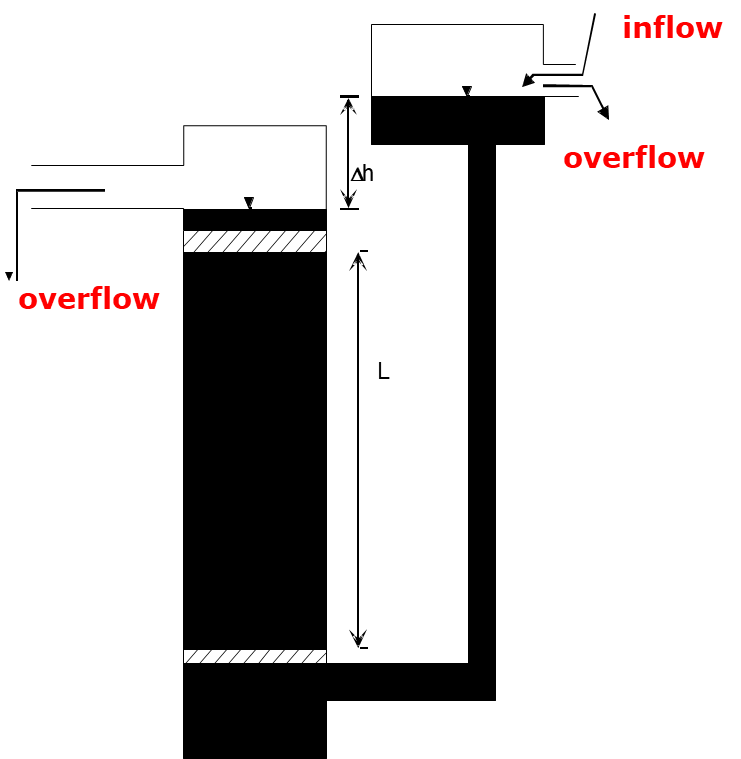

In [9]:
## Tutorial Problem 9: Constant-Head Permeameter

r1 = pn.pane.LaTeX(r"""
Derive the expression for $K$ given below.
$$
K = \frac{QL}{A(h_{in}-h_{out})}
$$

The hydraulic conductivity of a medium sand sample (length 15 cm, cross-sectional area 25 cm$^2$, fig. below) is to be determined. The hydraulic head difference is 5 cm and a water volume of 100 cm$^3$ passed the sample during an experimental period of 12 min.
How long would 100 cm$^3$ diesel (density: 0.85 g/cm$^3$, dynamic viscosity: 3.5$\cdot 10^{-3}$ Pa$\cdot$s at 20$^\circ$C) need to pass the sample under a head difference of 5 cm (density and dynamic viscosity of water at 20$^\circ$C: 998.2 kg/m$^3$ and 1.0087$\cdot 10^{-3}$ Pa$\cdot$s, resp.)?
""", style={'font-size': '14pt'}) 
spacer = pn.Spacer(width=100)

r2 =pn.pane.PNG("images/T02_TP9.png", width=400) 

pn.Row(r1,spacer, r2) 

Row(width=1000)
    [0] LaTeX(str, style={'font-size': '13pt'})
    [1] Spacer(width=100)
    [2] PNG(str, width=400)
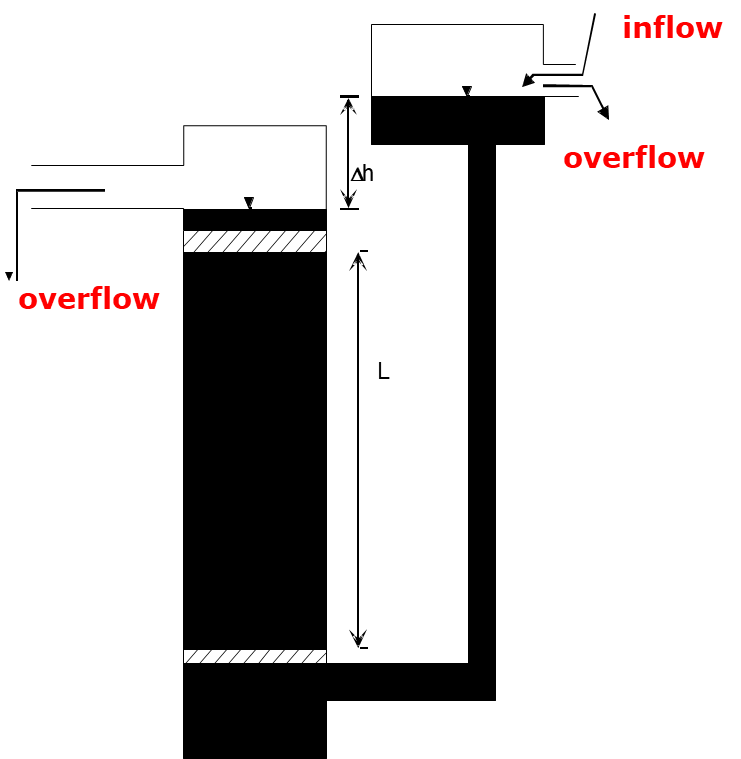

In [10]:
### Tutorial Problem 9 – Solution ###

r1 = pn.pane.LaTeX(r"""
$\text{Darcy's Law:}$
$$Q= -A\cdot K\frac{h_{out}-h_{in}}{L}$$
With,


Q = discharge [L$^3$/T]<br> 
L =column length [L]<br>
A = cross-sectional area of column [L$^2$]<br>
K = hydraulic conductivity [L/T]<br>
h$_{in}$ =hydraulic head at column inlet [L]<br>
h$_{out}$ = hydraulic head at column outlet [L]<br>
<br>
Solve for $K$:
$$
K= \frac{Q\cdot L}{A\cdot(h_{out}-h_{in})}
$$

If the reference level $(z = 0)$ is located at the downgradient overflow, then set $h_{out} = 0$.
""", style={'font-size': '13pt'} ) 
spacer = pn.Spacer(width=100)

r2 =pn.pane.PNG("images/T02_TP9.png", width=400) 

pn.Row(r1,spacer, r2, width=1000)    

In [11]:
#Given (solution on 9b)
L = 15 #cm, length of column
A = 25 # cm^2, surface area of column
h_diff = 5 # cm, h_in-h_out
Q = 100/12 # cm^3/min discharge per min

# Solution using derived equation in first part of the problem
# K = QL/A(h_in- h_out)

K = (Q*L)/(A*h_diff)# cm/min, required conductivity 
K_1 = K*10**-2/60 #, m/s, conductivity in m/s
#output
print("The conductivity in column is {0:1.2E}".format(K),"cm/min") 
print("The conductivity in column is {0:1.2E}".format(K_1),"m/s \n") 

if K_1 <= 1.67*10**-4:
    print("Fine to medium sand")
else:
    print("to check further") # to be completed later.

The conductivity in column is 1.00E+00 cm/min
The conductivity in column is 1.67E-04 m/s 

Fine to medium sand


Continue solution on 9c

Discharge and Darcy's law: $Q_{water} = \frac{V}{t_{water}}=-A\cdot K_{water}\cdot\frac{\Delta h}{L}$

Solve for $t_{water}$:   $t_{water} = \frac{V}{Q_{water}}=-\frac{V}{A\cdot K_{water}\cdot\Delta h/L} = -\frac{V\cdot L}{A\cdot K_{water}\cdot\Delta h}$

Same step for $t_{diesel}$:   $t_{diesel}  = -\frac{V\cdot L}{A\cdot K_{diesel}\cdot\Delta h}$



time ratio:$\frac{t_{diesel}}{t_{water}} = \frac{-\frac{V\cdot L}{A\cdot K_{diesel}\cdot\Delta h}}{-\frac{V\cdot L}{A\cdot K_{water}\cdot\Delta h}} = \frac{K_{water}}{K_{diesel}}$

Use relationship between conductivity $K$ and permeability $k$ from lecture notes!
$$\frac{K_{water}}{K_{diesel}} = \frac{k\cdot \frac{\rho_{water}\cdot g}{\eta_{water}}}{k\cdot \frac{\rho_{diesel}\cdot g}{\eta_{diesel}}} = \frac{\rho_{water}\cdot\eta_{diesel}}{\rho_{diesel}\cdot\eta_{water}}$$

Solve for $t_{diesel}$
 

In [12]:
# Given data

rho_w = 998.2 # kg/m^3, density of water at 20°C
eta_w = 1.0087*10**-3#, Pa-S dynamic viscosity of water
rho_d = 0.85 # g/cm^3, density of diesel at 20°C
eta_d = 3.5*10**-3#, Pa-S dynamic viscosity of diesel
V_d = 100 # cm^3 volume of diesel
t_w = 12 # min, time taken by water

# Calculations

t_d = (rho_w*eta_d)/(rho_d*1000*eta_w)*t_w 

# multiplied by 1000 to convert unit g/cm^3 to kg/m^3

print("The time required for diesel will be: {0:0.2f}".format(t_d), "min") 

The time required for diesel will be: 48.90 min


## Tutorial Problem 10: Falling-Head Permeameter

Row
    [0] Column
        [0] LaTeX(str, style={'font-size': '13pt'})
        [1] Markdown(str, style={'font-size': '13pt'})
    [1] Spacer(width=50)
    [2] PNG(str, width=300)
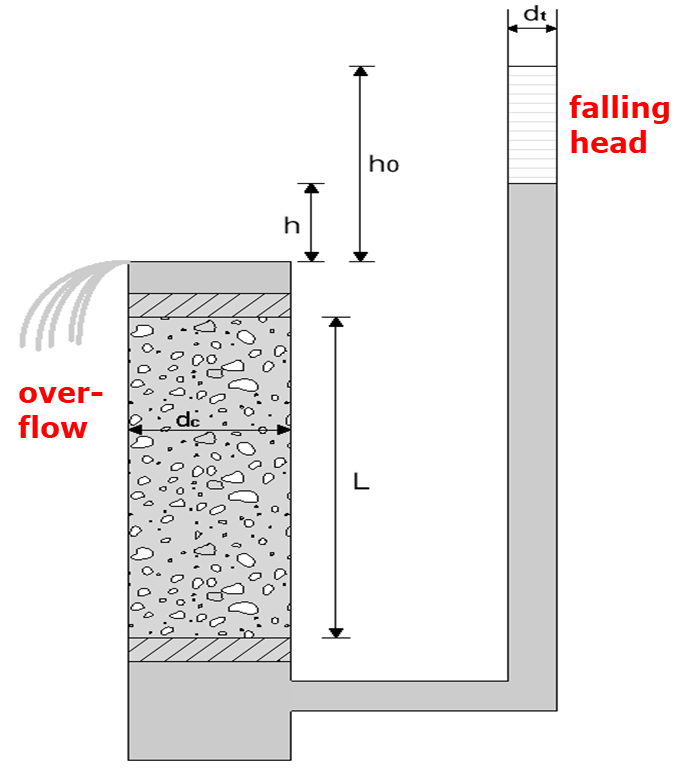

In [13]:
#
r10_1 = pn.pane.LaTeX(r"""
$$
K = \frac{d_t^2 L}{d_c^2 L}\cdot \ln\frac{h_{in}(0)-h_{out}}{h_{in}(t)-h_{out}}
$$
""",  style={'font-size': '13pt'})

r10_2 = pn.pane.Markdown("""
1. Derive the expression for K given above.

2. The hydraulic conductivity of a fine sand sample (length 15 cm, diameter 10 cm) is to be determined. The hydraulic head difference at the be-ginning and at the end of the experiment after 528 min is 5 cm and 0.5 cm, resp. The inner tube diameter is 2 cm. 

""", style={'font-size': '13pt'})

col1 = pn.Column(r10_1,r10_2)

r10_3 =pn.pane.PNG("images/T02_TP10.png", width=300)
spacer3 = pn.Spacer(width=50) 
pn.Row(col1, spacer3, r10_3) 

## Tutorial Problem 10: Solution##

Row
    [0] LaTeX(str, style={'font-size': '13pt'})
    [1] PNG(str, width=300)
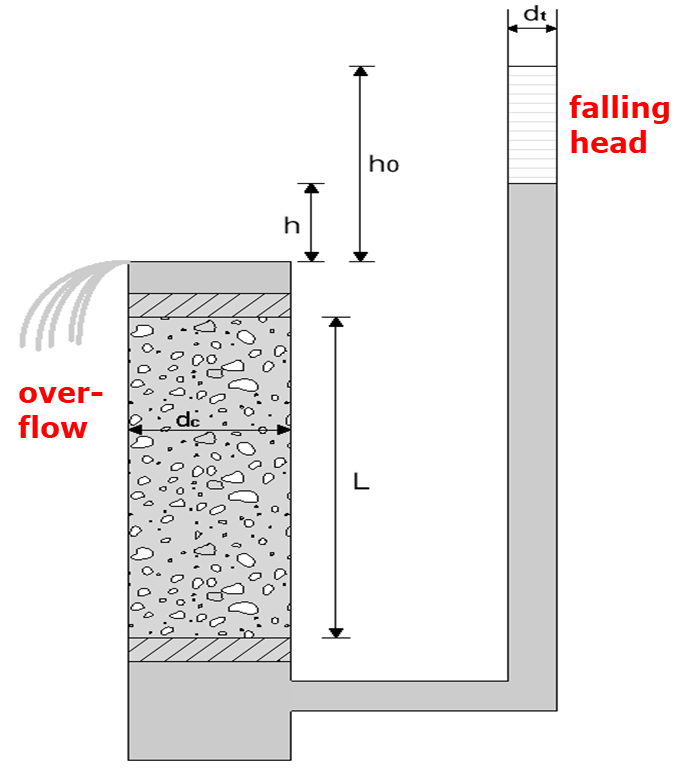

In [14]:
# Tutorial Problem 10: Solution

r10_a1 = pn.pane.LaTeX(r"""
Darcy's Law:
$$
Q(t) = -A_c \cdot K\cdot\frac{h_{out} - h_{in}(t)}{L} 
$$

Volumetric budget for standpipe:
$$
Q(t) = -\frac{dV_t}{dt}(t) = -A_t \cdot \frac{dh_{in}}{dt}(t) 
$$
with <br> 
$A_t$ = cross-sectional area of standpipe [L$^2$]<br>
$V_t$ = water volume in standpipe [L$^3$]<br>
<br>
combine Darcy's law and the volumetric budget:
$$
-A_t \cdot \frac{dh_{in}}{dt}(t) =  -A_c \cdot K\cdot\frac{h_{out} - h_{in}(t)}{L}
$$

solve for $dh_{in}/dt$:
$$
\frac{dh_{in}}{dt} = \frac{K}{L}\frac{A_c}{A_t}(h_{out}-h_{in}) = \frac{K}{L}\bigg(\frac{d_c}{d_t}\bigg)^2(h_{out}-h_{in})
$$

""", style={'font-size': '13pt'})
r10_a2 =pn.pane.PNG("images/T02_TP10.png", width=300)


pn.Row(r10_a1, r10_a2) 

In [15]:
#
r10_a3 = pn.pane.LaTeX(r"""
Equation for falling head: $ \frac{dh_{in}}{dt}  = \frac{K}{L}\big(\frac{d_c}{d_t}\big)^2(h_{out}-h_{in}) $
<br> <br>
This equation is an ordinary differential equation of first order. 
Providing hydraulic head $h_{in}(0)$ at the beginning of the experiment $(t = 0)$, it 
may be solved by separation of variables:
$$
\frac{dh_{in}}{h_{out}-h_{in}} = \frac{K}{L}\bigg(\frac{d_c}{d_t}\bigg)^2 dt
$$
integrations on both sides by considering the initial condition:
$$
\int_{h_{in}(0)}^{h_{out}(t)}\frac{dh_{in}}{h_{out}-h_{in}} = \int_0^t \frac{K}{L}\bigg(\frac{d_c}{d_t}\bigg)^2 dt = \frac{K}{L}\bigg(\frac{d_c}{d_t}\bigg)^2 \int_0^t dt
$$
determine integral functions:
$$
\Bigg[-\ln(h_{out} - h_{in}) \Bigg]_{h_{in}(0)}^{h_{out}(t)} = \frac{K}{L}\bigg(\frac{d_c}{d_t}\bigg)^2 [t]_0^t 
$$ 
insert limits of integration:
$$
-\ln\frac{h_{out}-h_{in}(t)}{h_{out}-h_{in}(0)} = \frac{K}{L}\bigg(\frac{d_c}{d_t}\bigg)^2 t 
$$
solve for K:
$$
K = \bigg(\frac{d_c}{d_t}\bigg)^2 \frac{L}{t}\ln\frac{h_{in}(0)-h_{out}}{h_{in}(t)-h_{out}}
$$
""", style={'font-size': '13pt'})
r10_a3

LaTeX(str, style={'font-size': '13pt'})

In [16]:
# Given

L = 15 # cm, length
d_c = 10 # cm, diameter column
d_t = 2 # cm, diameter tube
h_d0 = 5 # cm, head difference at start
h_dt = 0.5 # cm, head difference at time t
t = 528 # min, total time  
t_s = 528*60 # sec, total time in seconds

#solution using the developed equation 

K = (d_t/d_c)**2 * ((L/100)/t_s)*np.log(h_d0/h_dt)

#Output
print("The conductivity in column is {0:1.2E}".format(K),"m/s \n") 

if K < 1.67*10**-5:
    print("Silt or silty sand")
else:
    print("to check further") # to be completed later.

The conductivity in column is 4.36E-07 m/s 

Silt or silty sand


# HOME WORK PROBLEMS #


**Darcy's Law and Intrinsic Permeability**

_There is no obligation to solve homework problems!_






Row
    [0] Markdown(str, style={'font-size': '13pt'})
    [1] Spacer(width=50)
    [2] PNG(str, width=500)
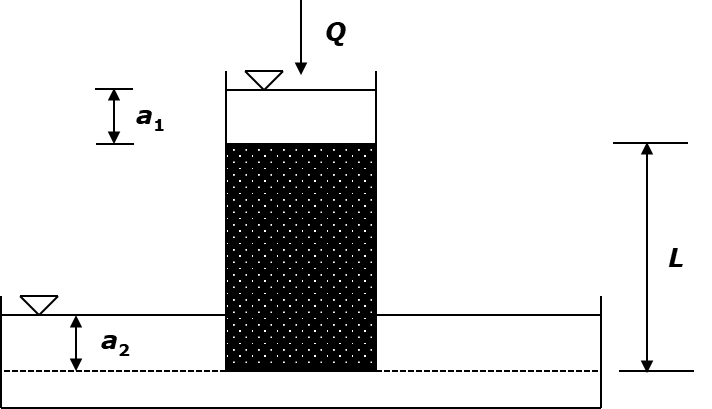

In [17]:
#
r_h3a = pn.pane.Markdown("""
## Homework Problem 3 ##


**A**. Derive an expression for hy-draulic conductivity K for the constant-head permeameter shown in the figure.<br><br>
**B**. The hydraulic conductivity of a sample (length 10 cm, dia-meter 4 cm) is to be determined. 
The water depths a<sub>1</sub> and a<sub>2</sub> equal 6 cm and 3 cm, resp. A water volume of 250 ml passed the sample during an experimental period of 36 s. <br> <br>
**C**. Which material could be con-tained in the sample?
""", style={'font-size': '13pt'})
spacer2=pn.Spacer(width=50)
r_h3b = pn.pane.PNG("images/T02_TH3.png", width=500)
pn.Row(r_h3a,spacer2, r_h3b) 


### Homework Problem 4 ###



Row
    [0] Column
        [0] Markdown(str, style={'font-size': '13pt'})
        [1] PNG(str, width=400)
        [2] Markdown(str, style={'font-size': '13pt'})
    [1] Spacer(width=50)
    [2] PNG(str, width=400)
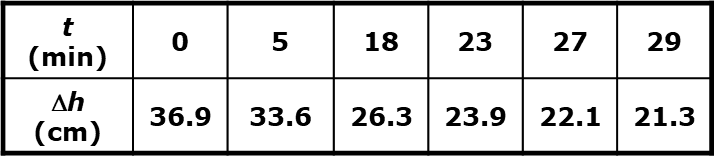
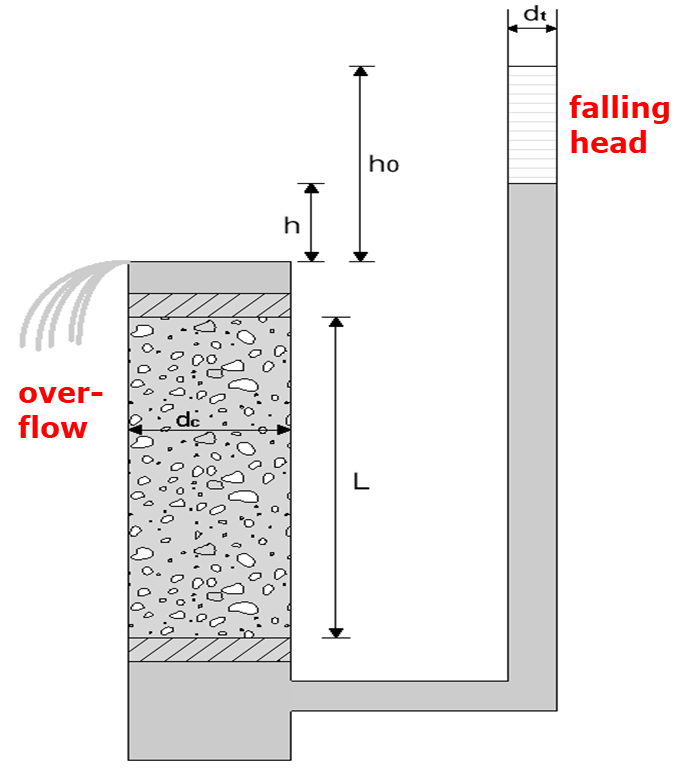

In [18]:
#
r_h4 = pn.pane.Markdown("""
A Darcy experiment is performed by a falling-head permeameter using water at 20°C. 
Length and diameter of the sample are 20 cm and 6 cm, resp. The inner tube dia-meter is 4 cm. 
The following data are available for the time-dependent hydraulic head difference : 
""", style={'font-size': '13pt'})

r_h4b = pn.pane.PNG("images/T02_TH4a.png", width=400)

r_h4c = pn.pane.Markdown("""
**A.** Convert times to seconds and plot the logarithm of the ratios of head differences ln(Δh(0)/Δh(t)) vs. time t. 
(Use the coordinate system on next page). <br><br>
**B.** Determine the slope of the correspon-ding regression line.<br><br>
**C.** Determine hydraulic conductivity K.<br><br>
**D.** Determine intrinsic permeability k.<br>

""", style={'font-size': '13pt'})
r_h4d = pn.Column(r_h4, r_h4b, r_h4c)
r_h4e = pn.pane.PNG("images/T02_TP10.png", width=400)
spacer2=pn.Spacer(width=50)
pn.Row(r_h4d, spacer2, r_h4e) 


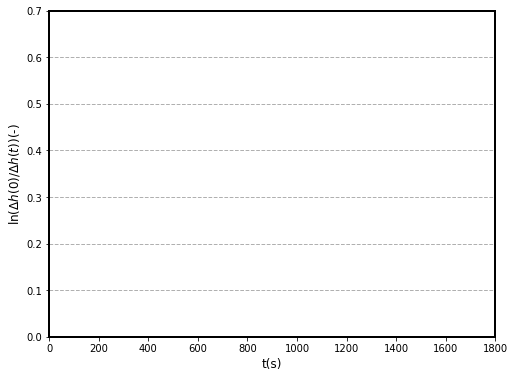

In [19]:
#
fig, ax = plt.subplots(figsize=(8, 6))  
plt.grid(axis='y', linestyle='--')   
plt.xlim((0, 1800)); plt.ylim((0,0.7)) 
plt.xlabel("t(s)", fontsize=12 )
plt.ylabel(r"ln($\Delta h(0)/\Delta h(t)$)(-)", fontsize=12); 
